In [ ]:
#Note that the links to the data need to be updated to match the actual location of files

In [2]:
import pysal as ps #Note that this is version 1.14 - it may show a deprecation warning, but code doesn't work with PySAL 2.0
from pysal.viz.splot.esda import lisa_cluster
import geopandas as gpd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
#Import spatial county object
link = '~/US_county_boundaries.shp'
gdf = gpd.read_file(link)

In [3]:
#Get spatial data for the three states of interest
#FIPS codes are as follows: 
#06 = California 
#17 = Illinois
#09 = Connecticut
gdf_CA = gdf[gdf['STFIPS'] == '06']
gdf_IL = gdf[gdf['STFIPS'] == '17']
gdf_CT = gdf[gdf['STFIPS'] == '09']

In [4]:
#Import the data to add to the gdf
CA1314_data = pd.read_csv('C:/Data_various/NME_shapefiles/CA2013_SatScan.csv')
CA1516_data = pd.read_csv('C:/Data_various/NME_shapefiles/CA2015_SatScan.csv')
CT_data = pd.read_csv('C:/Data_various/NME_shapefiles/CT_SatScan.csv')
IL_data = pd.read_csv('C:/Data_various/NME_shapefiles/IL_SatScan.csv')

#Reformat the county FIPS to be 5 digits 
CA1314_data['CTFIPS'] = CA1314_data['CTFIPS'].astype(str).str.pad(5, 'left', '0')
CA1516_data['CTFIPS'] = CA1516_data['CTFIPS'].astype(str).str.pad(5, 'left', '0')
CT_data['CTFIPS'] = CT_data['County_fips'].astype(str).str.pad(5, 'left', '0')
IL_data['CTFIPS'] = IL_data['CTFIPS'].astype(str).str.pad(5, 'left', '0')

#Only keep the columns needed 
CA1314_red = CA1314_data[['PBE_2013', 'Enrollment_2013', 'PBE_2014', 'Enrollment_2014', 'CTFIPS']]
CA1516_red = CA1516_data[['PBE_2015', 'Enrollment_2015', 'PBE_2016', 'Enrollment_2016', 'CTFIPS']]
CT_red = CT_data[['PBE_2014', 'Enrollment_2014', 'PBE_2015', 'Enrollment_2015', 'CTFIPS']]
IL_red = IL_data[['PBE_2014', 'Enrollment_2014', 'PBE_2015', 'Enrollment_2015', 'CTFIPS']]

#Merge geospatial data with the NME data
gdf_CA13 = gdf_CA.merge(CA1314_red, on = 'CTFIPS', how = 'left').dropna(subset = ['PBE_2013', 'PBE_2014'])
gdf_CA15 = gdf_CA.merge(CA1516_red, on = 'CTFIPS', how = 'left').dropna(subset = ['PBE_2015', 'PBE_2016'])
gdf_CT = gdf_CT.merge(CT_red, on = 'CTFIPS', how = 'left').dropna(subset = ['PBE_2014', 'PBE_2015'])
gdf_IL = gdf_IL.merge(IL_red, on = 'CTFIPS', how = 'left').dropna(subset = ['PBE_2014', 'PBE_2015'])

In [5]:
#Calculate relative risk by county
mean_CA1314 = np.sum(gdf_CA13['PBE_2013'].astype(float))/np.sum(gdf_CA13['Enrollment_2013'].astype(float))
mean_CA1516 = np.sum(gdf_CA15['PBE_2015'].astype(float))/np.sum(gdf_CA15['Enrollment_2015'].astype(float))
mean_IL = np.sum(gdf_IL['PBE_2014'].astype(float)) / np.sum(gdf_IL['Enrollment_2014'].astype(float))
mean_CT = np.sum(gdf_CT['PBE_2014'].astype(float)) / np.sum(gdf_CT['Enrollment_2014'].astype(float))

#Get a relative risk calculated as PBE / (population of county * mean risk)
gdf_CA13['rr_2013'] = gdf_CA13['PBE_2013'].astype(float) / (gdf_CA13['Enrollment_2013'].astype(float) * mean_CA1314)
gdf_CA13['rr_2014'] = gdf_CA13['PBE_2014'].astype(float) / (gdf_CA13['Enrollment_2014'].astype(float) * mean_CA1314)
gdf_CA15['rr_2015'] = gdf_CA15['PBE_2015'].astype(float) / (gdf_CA15['Enrollment_2015'].astype(float) * mean_CA1516)
gdf_CA15['rr_2016'] = gdf_CA15['PBE_2016'].astype(float) / (gdf_CA15['Enrollment_2016'].astype(float) * mean_CA1516)
gdf_IL['rr_2014'] = gdf_IL['PBE_2014'].astype(float) / (gdf_IL['Enrollment_2014'] * mean_IL)
gdf_IL['rr_2015'] = gdf_IL['PBE_2015'].astype(float) / (gdf_IL['Enrollment_2015'] * mean_IL)
gdf_CT['rr_2014'] = gdf_CT['PBE_2014'].astype(float) / (gdf_CT['Enrollment_2014'] * mean_CT)
gdf_CT['rr_2015'] = gdf_CT['PBE_2015'].astype(float) / (gdf_CT['Enrollment_2015'] * mean_CT)

In [6]:
#Get the mean and variance of relative risk for each year and location 
print('CA, 2013-2014: mean relative risk is', np.round(np.mean(gdf_CA13['rr_2013']), 3), 'and variance', np.round(np.var(gdf_CA13['rr_2013']),3))
print('CA, 2014-2015: mean relative risk is', np.round(np.mean(gdf_CA13['rr_2014']), 3), 'and variance', np.round(np.var(gdf_CA13['rr_2014']),3))
print('CA, 2015-2016: mean relative risk is', np.round(np.mean(gdf_CA15['rr_2015']), 3), 'and variance', np.round(np.var(gdf_CA15['rr_2015']),3))
print('CA, 2016-2017: mean relative risk is', np.round(np.mean(gdf_CA15['rr_2016']), 3), 'and variance', np.round(np.var(gdf_CA15['rr_2016']),3))
print('IL, 2014-2015: mean relative risk is', np.round(np.mean(gdf_IL['rr_2014']), 3), 'and variance', np.round(np.var(gdf_IL['rr_2014']),3))
print('IL, 2015-2016: mean relative risk is', np.round(np.mean(gdf_IL['rr_2015']), 3), 'and variance', np.round(np.var(gdf_IL['rr_2015']),3))
print('CT, 2014-2015: mean relative risk is', np.round(np.mean(gdf_CT['rr_2014']), 3), 'and variance', np.round(np.var(gdf_CT['rr_2014']),3))
print('CT, 2015-2016: mean relative risk is', np.round(np.mean(gdf_CT['rr_2015']), 3), 'and variance', np.round(np.var(gdf_CT['rr_2015']),3))


CA, 2013-2014: mean relative risk is 1.738 and variance 2.265
CA, 2014-2015: mean relative risk is 1.913 and variance 2.858
CA, 2015-2016: mean relative risk is 1.832 and variance 2.717
CA, 2016-2017: mean relative risk is 0.154 and variance 0.049
IL, 2014-2015: mean relative risk is 1.01 and variance 0.635
IL, 2015-2016: mean relative risk is 1.062 and variance 0.72
CT, 2014-2015: mean relative risk is 1.202 and variance 0.156
CT, 2015-2016: mean relative risk is 1.314 and variance 0.196


In [7]:
#Create spatial weight objects for the analysis 
wCA13 = ps.lib.weights.contiguity.Queen.from_dataframe(gdf_CA13)
wCA15 = ps.lib.weights.contiguity.Queen.from_dataframe(gdf_CA15)
wCT = ps.lib.weights.contiguity.Queen.from_dataframe(gdf_CT)
wIL = ps.lib.weights.contiguity.Queen.from_dataframe(gdf_IL)

In [8]:
#Moran's I analysis for all states and years 
I_rate_CA13 = ps.explore.esda.Moran_Rate(gdf_CA13['PBE_2013'], gdf_CA13['Enrollment_2013'], wCA13, permutations = 30000)
print('CALIFORNIA: For year 2013, Moran I adjusted for rate variables is ', np.round(I_rate_CA13.I, 3), 'with p-value ', np.round(I_rate_CA13.p_sim,3))

I_rate_CA14 = ps.explore.esda.Moran_Rate(gdf_CA13['PBE_2014'], gdf_CA13['Enrollment_2014'], wCA13, permutations = 30000)
print('CALIFORNIA: For year 2014, Moran I adjusted for rate variables is ', np.round(I_rate_CA14.I, 3), 'with p-value ', np.round(I_rate_CA14.p_sim,3))

I_rate_CA15 = ps.explore.esda.Moran_Rate(gdf_CA15['PBE_2015'], gdf_CA15['Enrollment_2015'], wCA15, permutations = 30000)
print('CALIFORNIA: For year 2015, Moran I adjusted for rate variables is ', np.round(I_rate_CA15.I, 3), 'with p-value ', np.round(I_rate_CA15.p_sim,3))

I_rate_CA16 = ps.explore.esda.Moran_Rate(gdf_CA15['PBE_2016'], gdf_CA15['Enrollment_2016'], wCA15, permutations = 30000)
print('CALIFORNIA: For year 2016, Moran I adjusted for rate variables is ', np.round(I_rate_CA16.I, 3), 'with p-value ', np.round(I_rate_CA16.p_sim,3))

I_rate_CT14 = ps.explore.esda.Moran_Rate(gdf_CT['PBE_2014'], gdf_CT['Enrollment_2014'], wCT, permutations = 30000)
print('CONNECTICUT: For year 2014, Moran I adjusted for rate variables is ', np.round(I_rate_CT14.I, 3), 'with p-value ', np.round(I_rate_CT14.p_sim,3))

I_rate_CT15 = ps.explore.esda.Moran_Rate(gdf_CT['PBE_2015'], gdf_CT['Enrollment_2015'], wCT, permutations = 30000)
print('CONNECTICUT: For year 2015, Moran I adjusted for rate variables is ', np.round(I_rate_CT15.I, 3), 'with p-value ', np.round(I_rate_CT15.p_sim,3))

I_rate_IL14 = ps.explore.esda.Moran_Rate(gdf_IL['PBE_2014'], gdf_IL['Enrollment_2014'], wIL, permutations = 30000)
print('ILLINOIS: For year 2014, Moran I adjusted for rate variables is ', np.round(I_rate_IL14.I, 3), 'with p-value ', np.round(I_rate_IL14.p_sim,3))

I_rate_IL15 = ps.explore.esda.Moran_Rate(gdf_IL['PBE_2015'], gdf_IL['Enrollment_2015'], wIL, permutations = 30000)
print('ILLINOIS: For year 2015, Moran I adjusted for rate variables is ', np.round(I_rate_IL15.I, 3), 'with p-value ', np.round(I_rate_IL15.p_sim,3))

CALIFORNIA: For year 2013, Moran I adjusted for rate variables is  0.247 with p-value  0.003
CALIFORNIA: For year 2014, Moran I adjusted for rate variables is  0.108 with p-value  0.073
CALIFORNIA: For year 2015, Moran I adjusted for rate variables is  0.22 with p-value  0.007
CALIFORNIA: For year 2016, Moran I adjusted for rate variables is  0.011 with p-value  0.292
CONNECTICUT: For year 2014, Moran I adjusted for rate variables is  -0.192 with p-value  0.457
CONNECTICUT: For year 2015, Moran I adjusted for rate variables is  -0.131 with p-value  0.456
ILLINOIS: For year 2014, Moran I adjusted for rate variables is  0.177 with p-value  0.003
ILLINOIS: For year 2015, Moran I adjusted for rate variables is  0.222 with p-value  0.001


In [9]:
#Repeat with local rates for a LISA analysis 
I_local_rate_CA13 = ps.explore.esda.Moran_Local_Rate(gdf_CA13['PBE_2013'], gdf_CA13['Enrollment_2013'], wCA13, permutations = 30000)
I_local_rate_CA14 = ps.explore.esda.Moran_Local_Rate(gdf_CA13['PBE_2014'], gdf_CA13['Enrollment_2014'], wCA13, permutations = 30000)
I_local_rate_CA15 = ps.explore.esda.Moran_Local_Rate(gdf_CA15['PBE_2015'], gdf_CA15['Enrollment_2015'], wCA15, permutations = 30000)
I_local_rate_CA16 = ps.explore.esda.Moran_Local_Rate(gdf_CA15['PBE_2016'], gdf_CA15['Enrollment_2016'], wCA15, permutations = 30000)
I_local_rate_CT14 = ps.explore.esda.Moran_Local_Rate(gdf_CT['PBE_2014'], gdf_CT['Enrollment_2014'], wCT, permutations = 30000)
I_local_rate_CT15 = ps.explore.esda.Moran_Local_Rate(gdf_CT['PBE_2015'], gdf_CT['Enrollment_2015'], wCT, permutations = 30000)
I_local_rate_IL14 = ps.explore.esda.Moran_Local_Rate(gdf_IL['PBE_2014'], gdf_IL['Enrollment_2014'], wIL, permutations = 30000)
I_local_rate_IL15 = ps.explore.esda.Moran_Local_Rate(gdf_IL['PBE_2015'], gdf_IL['Enrollment_2015'], wIL, permutations = 30000)

In [10]:
#Format the output for California 2013-2014 
gdf_CA13['Quarter13'] = I_local_rate_CA13.q
gdf_CA13['pval13'] = I_local_rate_CA13.p_sim
gdf_CA13['signif13'] = np.where(gdf_CA13['pval13'] < 0.05, gdf_CA13['Quarter13'], 0)
gdf_CA13['Quarter14'] = I_local_rate_CA14.q
gdf_CA13['pval14'] = I_local_rate_CA14.p_sim
gdf_CA13['signif14'] = np.where(gdf_CA13['pval14'] < 0.05, gdf_CA13['Quarter14'], 0)
gdf_CA13['signifboth'] = np.where((gdf_CA13['signif13'] == gdf_CA13['signif14']) & (gdf_CA13['signif13'] != 0), gdf_CA13['signif13'], 0)

In [11]:
#Format the output for California 2015-2016 
gdf_CA15['Quarter15'] = I_local_rate_CA15.q
gdf_CA15['pval15'] = I_local_rate_CA15.p_sim
gdf_CA15['signif15'] = np.where(gdf_CA15['pval15'] < 0.05, gdf_CA15['Quarter15'], 0)
gdf_CA15['Quarter16'] = I_local_rate_CA16.q
gdf_CA15['pval16'] = I_local_rate_CA16.p_sim
gdf_CA15['signif16'] = np.where(gdf_CA15['pval16'] < 0.05, gdf_CA15['Quarter16'], 0)
gdf_CA15['signifboth'] = np.where((gdf_CA15['signif15'] == gdf_CA15['signif16']) & (gdf_CA15['signif15'] != 0), gdf_CA15['signif15'], 0)

In [12]:
#Format the output for Illinois 2014-2015
gdf_IL['Quarter14'] = I_local_rate_IL14.q
gdf_IL['pval14'] = I_local_rate_IL14.p_sim
gdf_IL['signif14'] = np.where(gdf_IL['pval14'] < 0.05, gdf_IL['Quarter14'], 0)
gdf_IL['Quarter15'] = I_local_rate_IL15.q
gdf_IL['pval15'] = I_local_rate_IL15.p_sim
gdf_IL['signif15'] = np.where(gdf_IL['pval15'] < 0.05, gdf_IL['Quarter15'], 0)
gdf_IL['signifboth'] = np.where((gdf_IL['signif14'] == gdf_IL['signif15']) & (gdf_IL['signif14'] != 0), gdf_IL['signif14'], 0)

In [13]:
#Format the output for Connecticut 2014-2015
gdf_CT['Quarter14'] = I_local_rate_CT14.q
gdf_CT['pval14'] = I_local_rate_CT14.p_sim
gdf_CT['signif14'] = np.where(gdf_CT['pval14'] < 0.05, gdf_CT['Quarter14'], 0)
gdf_CT['Quarter15'] = I_local_rate_CT15.q
gdf_CT['pval15'] = I_local_rate_CT15.p_sim
gdf_CT['signif15'] = np.where(gdf_CT['pval15'] < 0.05, gdf_CT['Quarter15'], 0)
gdf_CT['signifboth'] = np.where((gdf_CT['signif14'] == gdf_CT['signif15']) & (gdf_CT['signif14'] != 0), gdf_CT['signif14'], 0)


In [15]:
#Calculate the rates of PBEs for the figure and add them to the relevant geodataframes
gdf_CA13['PBE_2014_rate'] = gdf_CA13['PBE_2014'] / gdf_CA13['Enrollment_2014']
gdf_CA15['PBE_2016_rate'] = gdf_CA15['PBE_2016'] / gdf_CA15['Enrollment_2016']
gdf_IL['PBE_2015_rate'] = gdf_IL['PBE_2015'] / gdf_IL['Enrollment_2015']
gdf_CT['PBE_2015_rate'] = gdf_CT['PBE_2015'] / gdf_CT['Enrollment_2015']

In [30]:
#Filter the geo-dataframes for the county outlines 

#California 2013-2015
gdf_CA13_pos_before = gdf_CA13[gdf_CA13['signif13'] == 1]
gdf_CA13_neg_after = gdf_CA13[gdf_CA13['signif14'] == 3]
gdf_CA13_pos = gdf_CA13[gdf_CA13['signifboth'] == 1]
gdf_CA13_neg = gdf_CA13[gdf_CA13['signifboth'] == 3]

#California 2015-2017
gdf_CA15_pos_before = gdf_CA15[gdf_CA15['signif15'] == 1]
gdf_CA15_neg_after = gdf_CA15[gdf_CA15['signif16'] == 3]
gdf_CA15_pos = gdf_CA15[gdf_CA15['signifboth'] == 1]
gdf_CA15_neg = gdf_CA15[gdf_CA15['signifboth'] == 3]

#Illinois 2014-2016
gdf_IL_pos_before = gdf_IL[gdf_IL['signif14'] == 1]
gdf_IL_neg_after = gdf_IL[gdf_IL['signif15'] == 3]
gdf_IL_pos = gdf_IL[gdf_IL['signifboth'] == 1]
gdf_IL_neg = gdf_IL[gdf_IL['signifboth'] == 3]

#Connecticut 2014-2016
gdf_CT_pos_before = gdf_CT[gdf_CT['signif14'] == 1]
gdf_CT_neg_after = gdf_CT[gdf_CT['signif15'] == 3]
gdf_CT_pos = gdf_CT[gdf_CT['signifboth'] == 1]
gdf_CT_neg = gdf_CT[gdf_CT['signifboth'] == 3]

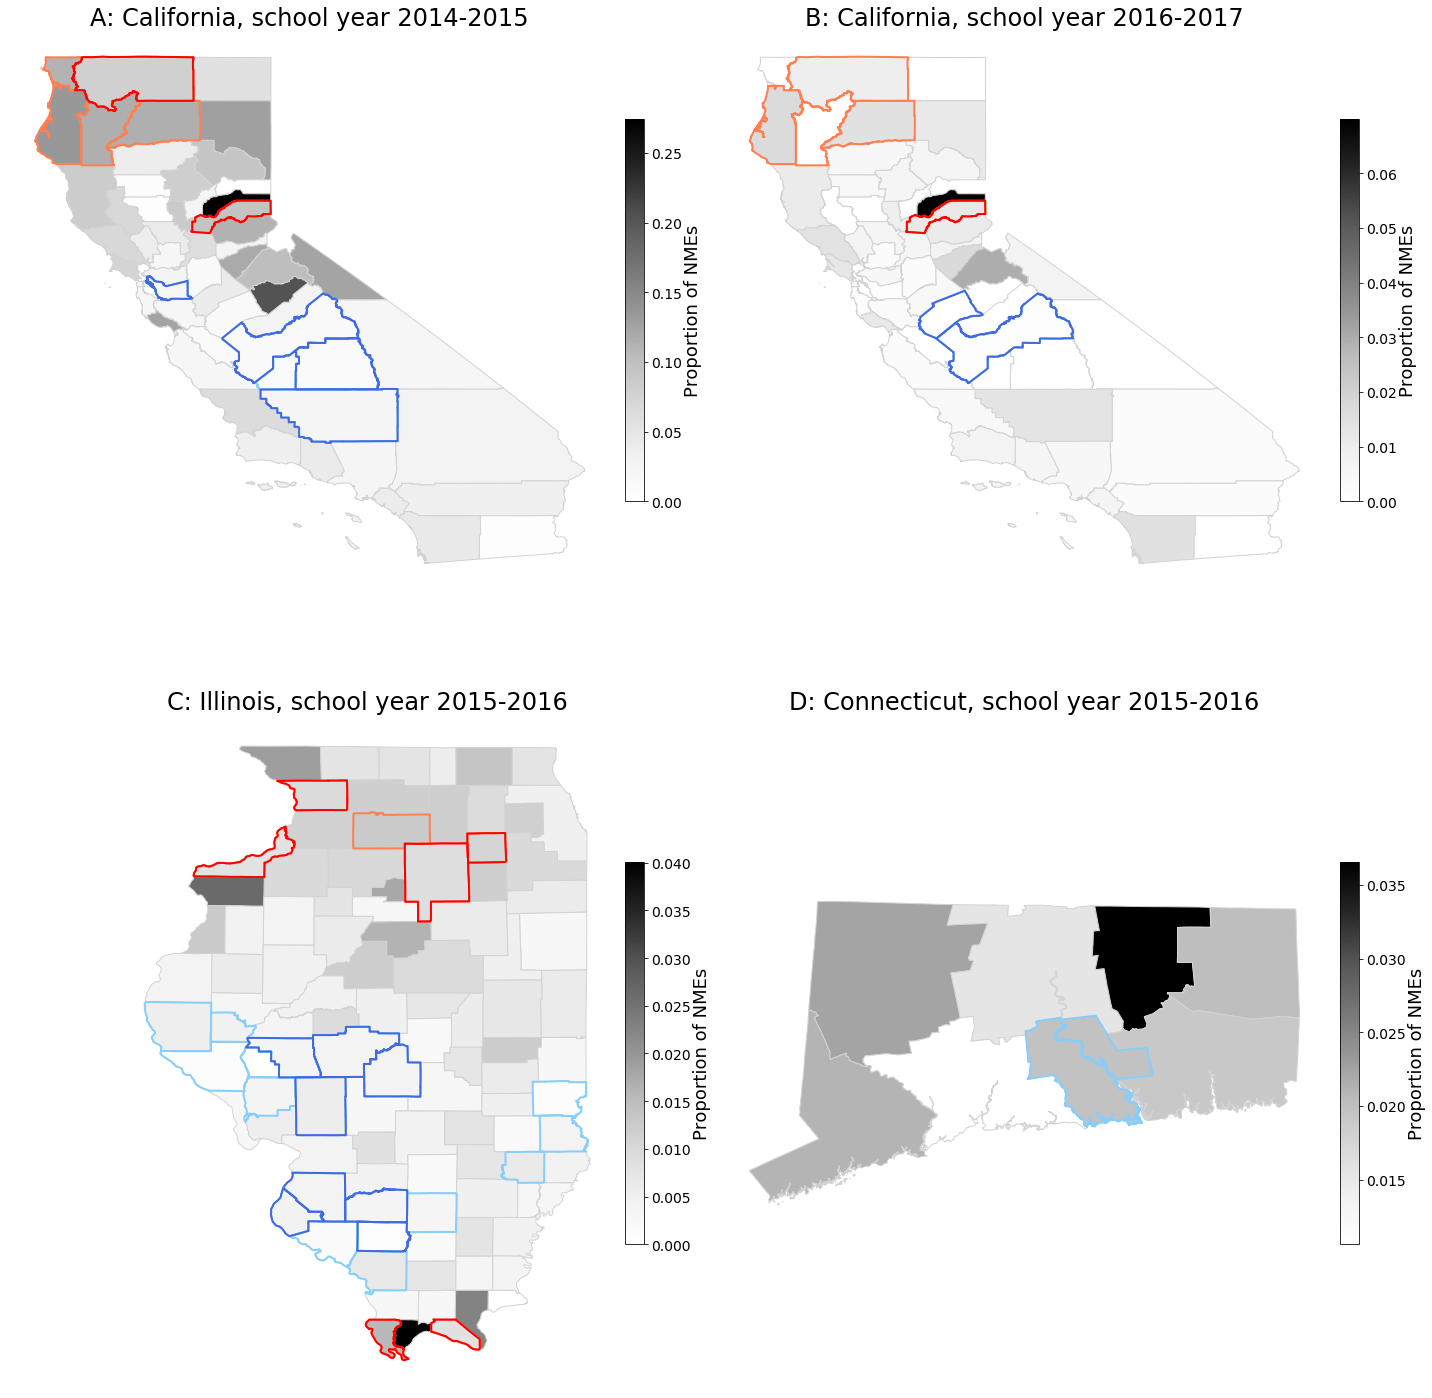

In [32]:
#Make that into a panelled figure 
#Make sure to run the single figures first - to create the dataframes
plt.figure(figsize = (20,20))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


#Panel A - California 2013-2015
gdf_CA13.plot(column = 'PBE_2014_rate', cmap = 'Greys', ax = ax1, edgecolor = 'lightgrey')
gdf_CA13_pos_before.plot(ax = ax1, facecolor = 'None', edgecolor = '#FF7F50', linewidth=2)
gdf_CA13_neg_after.plot(ax = ax1, facecolor = 'None', edgecolor = '#87CEFA', linewidth=2)
gdf_CA13_pos.plot(ax = ax1, facecolor = 'None', edgecolor = '#FF0000', linewidth=2)
gdf_CA13_neg.plot(ax = ax1, facecolor = 'None', edgecolor = '#4169E1', linewidth =2)
ax1.axis('off')

# Create colorbar as a legend
sm_ax1 = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=np.min(gdf_CA13['PBE_2014_rate']), vmax=np.max(gdf_CA13['PBE_2014_rate'])))
# empty array for the data range
sm_ax1._A = []
# add the colorbar to the figure
cbar_ax1 = plt.colorbar(sm_ax1, fraction=0.03, pad=0.02, ax = ax1)
#add label 
cbar_ax1.set_label("Proportion of NMEs", labelpad=2, size=18)
cbar_ax1.ax.tick_params(labelsize=14)

#Add a title 
ax1.set_title('A: California, school year 2014-2015', size = 24)

#California - 2015 to 2017
gdf_CA15.plot(column = 'PBE_2016_rate', cmap = 'Greys', ax = ax2, edgecolor = 'lightgrey')
gdf_CA15_pos_before.plot(ax = ax2, facecolor = 'None', edgecolor = '#FF7F50', linewidth=2)
gdf_CA15_neg_after.plot(ax = ax2, facecolor = 'None', edgecolor = '#87CEFA', linewidth=2)
gdf_CA15_pos.plot(ax = ax2, facecolor = 'None', edgecolor = '#FF0000', linewidth=2)
gdf_CA15_neg.plot(ax = ax2, facecolor = 'None', edgecolor = '#4169E1', linewidth = 2)
ax2.axis('off')

# Create colorbar as a legend
sm_ax2 = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=np.min(gdf_CA15['PBE_2016_rate']), vmax=np.max(gdf_CA15['PBE_2016_rate'])))
# empty array for the data range
sm_ax2._A = []
# add the colorbar to the figure
cbar_ax2 = plt.colorbar(sm_ax2, fraction=0.03, pad=0.02, ax = ax2)
#add label 
cbar_ax2.set_label("Proportion of NMEs", labelpad=2, size=18)
cbar_ax2.ax.tick_params(labelsize=14)
#Add a title 
ax2.set_title('B: California, school year 2016-2017', size = 24)

#Illinois - 2014 to 2016
gdf_IL.plot(column = 'PBE_2015_rate', cmap = 'Greys', ax = ax3, edgecolor = 'lightgrey')
gdf_IL_pos_before.plot(ax = ax3, facecolor = 'None', edgecolor = '#FF7F50', linewidth=2)
gdf_IL_neg_after.plot(ax = ax3, facecolor = 'None', edgecolor = '#87CEFA', linewidth=2)
gdf_IL_pos.plot(ax = ax3, facecolor = 'None', edgecolor = '#FF0000', linewidth=2)
gdf_IL_neg.plot(ax = ax3, facecolor = 'None', edgecolor = '#4169E1', linewidth =2)
ax3.axis('off')

# Create colorbar as a legend
sm_ax3 = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=np.min(gdf_IL['PBE_2015_rate']), vmax=np.max(gdf_IL['PBE_2015_rate'])))
# empty array for the data range
sm_ax3._A = []
# add the colorbar to the figure
cbar_ax3 = plt.colorbar(sm_ax3, fraction=0.03, pad=0.02, ax = ax3)
#add label 
cbar_ax3.set_label("Proportion of NMEs", labelpad=2, size=18)
cbar_ax3.ax.tick_params(labelsize=14)
#Add a title 
ax3.set_title('C: Illinois, school year 2015-2016', size = 24)

#Connecticut - 2015 to 2017
gdf_CT.plot(column = 'PBE_2015_rate', cmap = 'Greys', ax = ax4, edgecolor = 'lightgrey')
gdf_CT_pos_before.plot(ax = ax4, facecolor = 'None', edgecolor = '#FF7F50', linewidth=2)
gdf_CT_neg_after.plot(ax = ax4, facecolor = 'None', edgecolor = '#87CEFA', linewidth=2)
gdf_CT_pos.plot(ax = ax4, facecolor = 'None', edgecolor = '#FF0000', linewidth=2)
gdf_CT_neg.plot(ax = ax4, facecolor = 'None', edgecolor = '#4169E1', linewidth =2)
ax4.axis('off')

# Create colorbar as a legend
sm_ax4 = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=np.min(gdf_CT['PBE_2015_rate']), vmax=np.max(gdf_CT['PBE_2015_rate'])))
# empty array for the data range
sm_ax4._A = []
# add the colorbar to the figure
cbar_ax4 = plt.colorbar(sm_ax4, fraction=0.03, pad=0.02, ax = ax4)
#add label 
cbar_ax4.set_label("Proportion of NMEs", labelpad=2, size=18)
cbar_ax4.ax.tick_params(labelsize=14)
#Add a title 
ax4.set_title('D: Connecticut, school year 2015-2016', size = 24, pad = 177)

plt.tight_layout() 

#plt.savefig('~/fig3.png', dpi = 600)